# Project 1
----

### Analysis

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time
import datetime

from pprint import pprint

# Import API key
#from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Data Gathering


In [137]:
#Mental Health Facilities in the US
facilities_file = "../data/rawdata/Behavioral_Health_Treatment_Facility_listing_2019_03_22_215606.csv"
facilities_df = pd.read_csv(facilities_file)
facilities_df_sub = facilities_df[['    name1', 'name2', 'city', 'state', 'zip', 'latitude', 'longitude']]
facilities_df_final = facilities_df_sub.rename(columns={"    name1":"name1"})
print(facilities_df_final.count())

#US Census Bureau population in 50 US States
us_population_file = "../data/cleandata/PopulationEstimatesByState.csv"
pop_df = pd.read_csv(us_population_file)

pop_df = pop_df.rename(columns={"Abbv":"state"})
pop_df['Population'] = pop_df['Population'].str.replace(',', '')
pop_df["Population"] = pd.to_numeric(pop_df["Population"])
pop_df.head()

name1        9686
name2        5430
city         9686
state        9686
zip          9686
latitude     9685
longitude    9685
dtype: int64


,state,States,Population
0,AL,Alabama,4887871
1,AK,Alaska,737438
2,AZ,Arizona,7171646
3,AR,Arkansas,3013825
4,CA,California,39557045


In [138]:
facilities_df.loc[facilities_df['    name1'] =='TrueNorth Wellness Services', :]
facilities_df_final.dropna(subset=['latitude', 'longitude'], inplace=True)

In [139]:
#remove us territories:  GU (Guam), AS (), PR (Puerto Rico), VI (Virgin Islands)
us_facilities_df = facilities_df_final[(facilities_df_final.state != 'GU') & (facilities_df_final.state != 'AS') & (facilities_df_final.state != 'PR') & (facilities_df_final.state != 'VI')]
print(us_facilities_df.count())
print(us_facilities_df.state.unique())

name1        9614
name2        5379
city         9614
state        9614
zip          9614
latitude     9614
longitude    9614
dtype: int64
['TX' 'LA' 'AR' 'MS' 'OK' 'AL' 'MO' 'TN' 'KS' 'NM' 'FL' 'IL' 'KY' 'GA'
 'CO' 'NE' 'IN' 'IA' 'NC' 'SC' 'AZ' 'VA' 'OH' 'SD' 'WI' 'WY' 'WV' 'MN'
 'UT' 'MI' 'PA' 'CA' 'MD' 'ND' 'NV' 'MT' 'DC' 'ID' 'NY' 'DE' 'NJ' 'CT'
 'MA' 'VT' 'OR' 'RI' 'NH' 'WA' 'ME' 'AK' 'HI']


In [141]:
#us_facilities_df['latitude'].notna()


In [142]:
# Merge two dataframes using an inner join
merge_table = pd.merge(facilities_df_final, pop_df, on="state", how='inner')
merge_table.head()


,name1,name2,city,state,zip,latitude,longitude,States,Population
0,Sheltering Harbour,NaN,Spring,TX,77379,30.031183,-95.489886,Texas,28701845
1,Cypress Creek Hospital,NaN,Houston,TX,77090,30.024661,-95.444850,Texas,28701845
2,Intracare North Hospital,NaN,Houston,TX,77090,30.023827,-95.440085,Texas,28701845
3,Tomball Regional Medical Center,Senior Care Behavioral Health,Tomball,TX,77375,30.087405,-95.623617,Texas,28701845
4,Unity Childrens Home,Trickey Road Location,Houston,TX,77067,29.956039,-95.445391,Texas,28701845


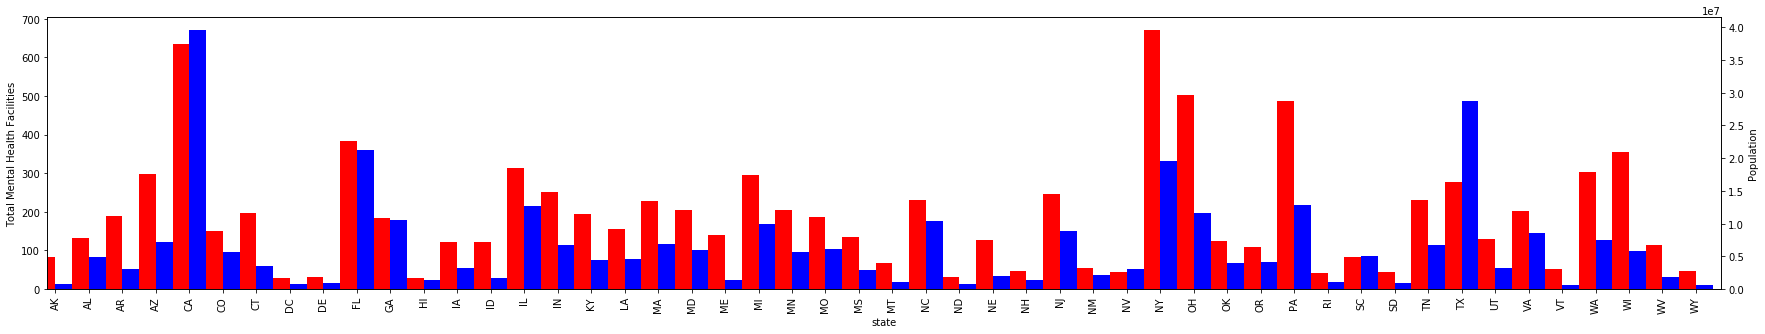

In [153]:
facilities_count_by_state = merge_table.groupby('state').agg({'name1':'count','Population':'mean'})
facilities_count_by_state.rename(columns={"name1":"Count"})
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


facilities_count_by_state.name1.plot(kind='bar', color='red', ax=ax, figsize=(30,5), position=1)
facilities_count_by_state.Population.plot(kind='bar', color='blue', ax=ax2, figsize=(30,5), position=0)

ax.set_ylabel('Total Mental Health Facilities')
ax2.set_ylabel('Population')

plt.show()

In [155]:
facilities_count_by_state

,name1,Population
state,,
AK,82,737438
AL,133,4887871
AR,190,3013825
AZ,299,7171646
CA,634,39557045
CO,150,5695564
CT,197,3572665
DC,29,702455
DE,30,967171


Text(0, 0.5, 'State Population in Millions')

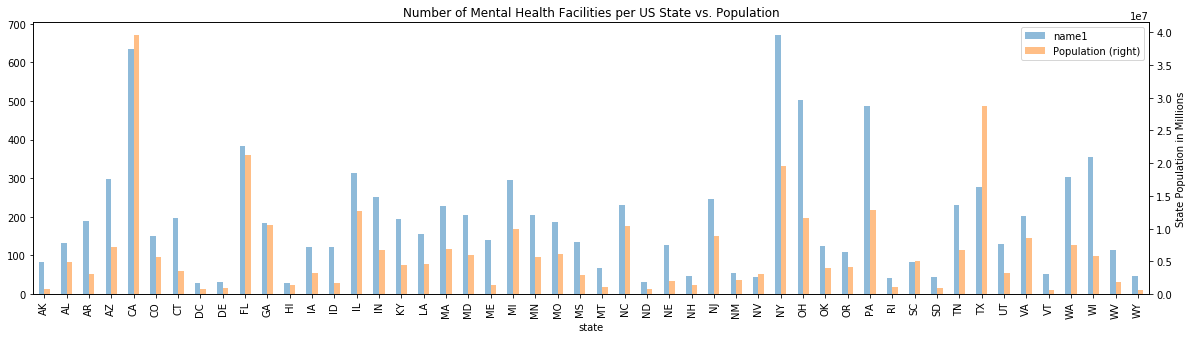

In [152]:
#plot how many mental health facilities found in each state
#facilities_count_by_state = us_facilities_df.groupby('state').name1.count()
facilities_count_by_state.plot.bar(secondary_y= 'Population', figsize=(20,5), alpha=0.5)
plt.title("Number of Mental Health Facilities per US State")
plt.title("Number of Mental Health Facilities per US State vs. Population")
plt.xlabel("State")
plt.ylabel("State Population in Millions")

Text(0, 0.5, 'Count')

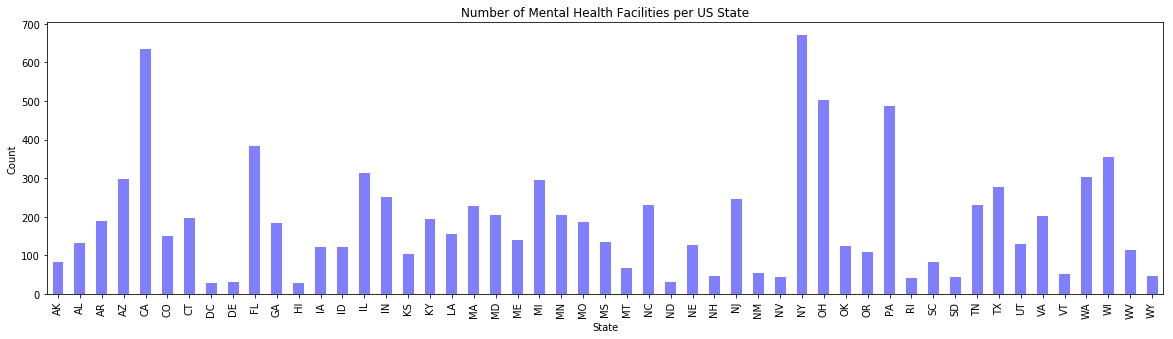

In [146]:
#plot how many mental health facilities found in each state
facilities_count_by_state = us_facilities_df.groupby('state').name1.count()
facilities_count_by_state.plot.bar(figsize=(20,5), color='b', alpha=0.5)
plt.title("Number of Mental Health Facilities per US State")
plt.xlabel("State")
plt.ylabel("Count")

In [2]:
suicide_us = "../data/MaybeData/master.csv"
suicide_df = pd.read_csv(suicide_us)
US_data = suicide_df [suicide_df['country'] == 'United States']
US_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [6]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26848 to 27219
Data columns (total 12 columns):
country               372 non-null object
year                  372 non-null int64
sex                   372 non-null object
age                   372 non-null object
suicides_no           372 non-null int64
population            372 non-null int64
suicides/100k pop     372 non-null float64
country-year          372 non-null object
HDI for year          120 non-null float64
 gdp_for_year ($)     372 non-null object
gdp_per_capita ($)    372 non-null int64
generation            372 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [ ]:
# Split up our data into groups based upon 'gender'
#IF FILTERING, FIRST REDUCE DATASET
age_groups = US_data.groupby(['year','age'])


# Find out how many of each gender took bike trips
age_suicides = age_groups['suicides_no'].sum()
#age_suicides.plot(title="Suicides by Age", figsize=(25,5))
#age_groups.boxplot()

In [4]:

US_summary_table = US_data.groupby('age').agg({'country': 'count',
                                                      'suicides/100k pop':'mean',
                                                      'gdp_per_capita ($)':'mean',
                                                      'HDI for year':'mean',
                                                      'suicides_no':'sum'})
US_summary_table

,country,suicides/100k pop,gdp_per_capita ($),HDI for year,suicides_no
age,,,,,
15-24 years,62,11.345968,39269.612903,0.8916,141679
25-34 years,62,14.172419,39269.612903,0.8916,182047
35-54 years,62,16.040645,39269.612903,0.8916,380917
5-14 years,62,0.733387,39269.612903,0.8916,8923
55-74 years,62,15.943065,39269.612903,0.8916,224770
75+ years,62,24.683387,39269.612903,0.8916,95677


In [63]:
US_data.groupby(['year','age']).agg({'suicides_no':'sum'})

suicides_no
year age                     
1985 15-24 years         5121
     25-34 years         6376
     35-54 years         8158
     5-14 years           278
     55-74 years         6870
     75+ years           2643
1986 15-24 years         5120
     25-34 years         6711
     35-54 years         8749
     5-14 years           255
     55-74 years         7196
     75+ years           2861
1987 15-24 years         4924
     25-34 years         6655
     35-54 years         8839
     5-14 years           251
     55-74 years         7078
     75+ years           3036
1988 15-24 years         4929
     25-34 years         6710
     35-54 years         8737
     5-14 years           243
     55-74 years         6702
     75+ years           3067
1989 15-24 years         4870
     25-34 years         6565
     35-54 years         8973
     5-14 years           240
     55-74 years         6617
     75+ years           2953
...                       ...
2011 15-24 years         4822
     25-34 years         6100
     35-54 years        15457
     5-14 years           287
     55-74 years         9700
     75+ years           3142
2012 15-24 years         4872
     25-34 years         6216
     35-54 years        15620
     5-14 years           311
     55-74 years        10296
     75+ years           3281
2013 15-24 years         4878
     25-34 years         6348
     35-54 years        15172
     5-14 years           395
     55-74 years        10929
     75+ years           3421
2014 15-24 years         5079
     25-34 years         6569
     35-54 years        15473
     5-14 years           428
     55-74 years        11637
     75+ years           3583
2015 15-24 years         5491
     25-34 years         6947
     35-54 years        15687
     5-14 years           413
     55-74 years        11940
     75+ years           3711

[186 rows x 1 columns]

In [14]:
df_by_yr=US_data.groupby(['year', 'sex'], as_index=False)
df_tot_by_yr=df_by_yr['suicides_no'].sum()
df_tot_by_yr.head()

,year,sex,suicides_no
0,1985,female,6308
1,1985,male,23138
2,1986,female,6677
3,1986,male,24215
4,1987,female,6522


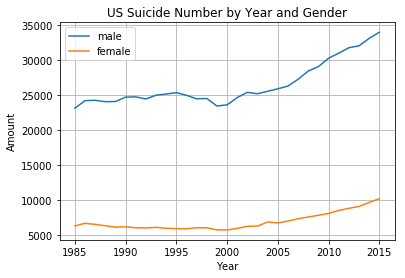

In [15]:
males = df_tot_by_yr.loc[df_tot_by_yr['sex']=="male", 'suicides_no']
females = df_tot_by_yr.loc[df_tot_by_yr['sex']=="female", 'suicides_no']
time_line = df_tot_by_yr['year'].unique()

fig, ax = plt.subplots()
ax.plot(time_line, males, label="male")
ax.plot(time_line, females, label="female")
ax.legend()

# Incorporate the other graph properties
plt.title(f"US Suicide Number by Year and Gender" )
plt.ylabel("Amount")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [16]:
df_by_yr_world=suicide_df.groupby(['year', 'sex'], as_index=False)
df_tot_by_yr_world=df_by_yr_world['suicides_no'].sum()
df_tot_by_yr_world.head()

,year,sex,suicides_no
0,1985,female,32479
1,1985,male,83584
2,1986,female,33852
3,1986,male,86818
4,1987,female,35006


In [19]:
df_by_gen=US_data.groupby(['age', 'year'], as_index=False)
df_tot_by_gen=df_by_gen['suicides_no'].sum()
df_tot_by_gen.head()

,age,year,suicides_no
0,15-24 years,1985,5121
1,15-24 years,1986,5120
2,15-24 years,1987,4924
3,15-24 years,1988,4929
4,15-24 years,1989,4870


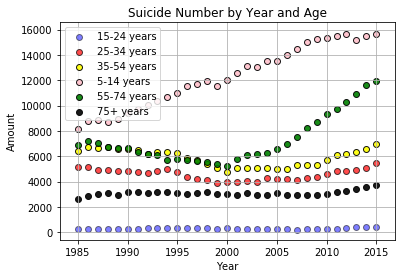

In [20]:
silent = df_tot_by_gen.loc[df_tot_by_gen['age']=="5-14 years"]
boomers = df_tot_by_gen.loc[df_tot_by_gen['age']=="15-24 years"]
genx = df_tot_by_gen.loc[df_tot_by_gen['age']=="25-34 years"]
genz = df_tot_by_gen.loc[df_tot_by_gen['age']=="35-54 years"]
gi_gen = df_tot_by_gen.loc[df_tot_by_gen['age']=="55-74 years"]
millens = df_tot_by_gen.loc[df_tot_by_gen['age']=="75+ years"]
time_line = df_tot_by_gen['year'].unique()

types=df_tot_by_gen['age'].unique()
#Build scatterplots
plt.scatter(silent["year"], silent["suicides_no"], alpha=.5, color='blue', edgecolors='black', marker='o', label='15-24 years')
plt.scatter(boomers["year"], boomers["suicides_no"], alpha=.7, color='red', edgecolors='black', marker='o', label='25-34 years')
plt.scatter(genx["year"], genx["suicides_no"], alpha=.9, color='yellow', edgecolors='black', marker='o', label='35-54 years')
plt.scatter(genz["year"], genz["suicides_no"], alpha=.9, color='pink', edgecolors='black', marker='o', label='5-14 years')
plt.scatter(gi_gen["year"], gi_gen["suicides_no"], alpha=.9, color='green', edgecolors='black', marker='o', label='55-74 years')
plt.scatter(millens["year"], millens["suicides_no"], alpha=.9, color='black', edgecolors='black', marker='o', label='75+ years')

lgnd=plt.legend(types, loc="best")
# Incorporate the other graph properties
plt.title(f"Suicide Number by Year and Age" )
plt.ylabel("Amount")
plt.xlabel("Year")

plt.grid(True)

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [51]:

df_by_gen=US_data.groupby(['year', 'age'], as_index=False)
df_tot_by_gen=df_by_gen['suicides_no'].sum()
df_tot_by_gen.head()

,year,age,suicides_no
0,1985,15-24 years,5121
1,1985,25-34 years,6376
2,1985,35-54 years,8158
3,1985,5-14 years,278
4,1985,55-74 years,6870


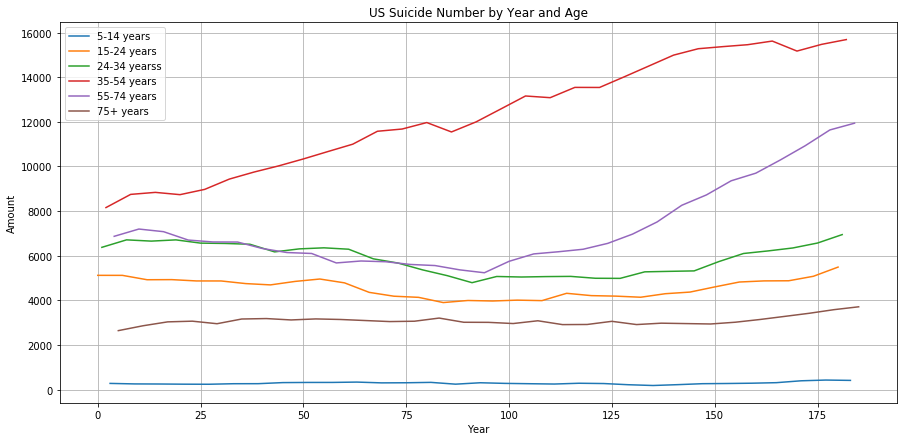

In [22]:
df_tot_by_gen.loc[df_tot_by_gen['age']=="5-14 years", "suicides_no"].plot(label="5-14 years")
df_tot_by_gen.loc[df_tot_by_gen['age']=="15-24 years", "suicides_no"].plot(label="15-24 years")
df_tot_by_gen.loc[df_tot_by_gen['age']=="25-34 years", "suicides_no"].plot(label="24-34 yearss")
df_tot_by_gen.loc[df_tot_by_gen['age']=="35-54 years", "suicides_no"].plot(label="35-54 years")
df_tot_by_gen.loc[df_tot_by_gen['age']=="55-74 years", "suicides_no"].plot(label="55-74 years")
df_tot_by_gen.loc[df_tot_by_gen['age']=="75+ years", "suicides_no"].plot(label="75+ years")
time_line = df_tot_by_yr['year'].unique()

#average_unemployment.plot(label="World Average")
#combined_unemployed_data.loc['USA', "2010":"2014"].plot(
#    label="United States")
plt.legend()
#plt.show()
# Create our x_axis list

#fig, ax = plt.subplots()
#ax.plot(time_line, gen1, label="5-14 years")
#ax.plot(time_line, gen2, label="15-24 years")
#ax.plot(time_line, gen3, label="24-34 years")
#ax.plot(time_line, gen4, label="35-54 years")
#ax.plot(time_line, gen5, label="55-74 years")
#ax.plot(time_line, gen6, label="75+ years")
#ax.legend()

# Incorporate the other graph properties
plt.title(f"US Suicide Number by Year and Age" )
plt.ylabel("Amount")
plt.xlabel("Year")
plt.grid(True)
plt.show()

### Perform API Calls


### Post API call check of data
* Export the city data into a .csv.
* Display the DataFrame info

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.